# Introducción

Esta presentación tiene como objetivo analizar las 4 tiendas AluraStore con la finalidad de determinar cual de ellas es candidata idonea para ser vendida.

# Desarrolo

### Importación de datos



## Realizamos un alaisis de datos
En este bloque analizamos los datos provistos, y podemos dilusidar que no presenta inconsistencias, ni valores nulos.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Creamos una lista de tiendas para facilitar su recorrido
tiendas = [tienda, tienda2, tienda3, tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
#Identificacion de valores nulos en cada Tienda

In [3]:
tienda.isnull().sum()
tienda2.isnull().sum()
tienda3.isnull().sum()
tienda4.isnull().sum()

#No se detectan valores nulos


,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


#1. Análisis de facturación



Podemos concluir Que la tienda 4 es la de menor ventas con una facturación de $1.038.375.700, mientras que la tienda uno presenta una facturación muy positiva de 1.150.880.400

In [4]:
#Analisamos la facturación total de todas las tiendas
for x in range(len(tiendas)):
  print(f"Facturación de la Tienda {x+1}: ${tiendas[x].Precio.sum()}")

Facturación de la Tienda 1: $1150880400.0
Facturación de la Tienda 2: $1116343500.0
Facturación de la Tienda 3: $1098019600.0
Facturación de la Tienda 4: $1038375700.0


<Axes: >

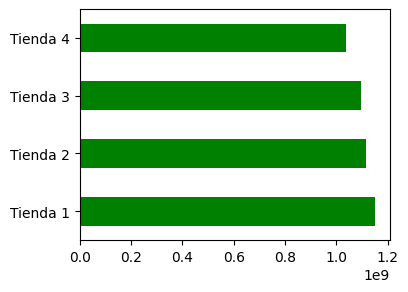

In [5]:
#Realizamos un grafico
#Creamos una serie con los resultados
facturacion = pd.Series({
    "Tienda 1": tienda.Precio.sum(),
    "Tienda 2": tienda2.Precio.sum(),
    "Tienda 3": tienda3.Precio.sum(),
    "Tienda 4": tienda4.Precio.sum()
})

facturacion.plot(kind="barh", figsize=(4, 3), color="green")

# 2. Ventas por categoría

En este analisis de ventas por categoría podemos visualizar como 'Muebles' y 'Electronicos' ocupan los primeros lugares en ventas. Mientras que 'Artículos para el hogar', 'Libros' e 'Instrumentos Musicales' se mantiene en los peldaños mas bajos de ventas

In [6]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [7]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

<Axes: ylabel='Categoría del Producto'>

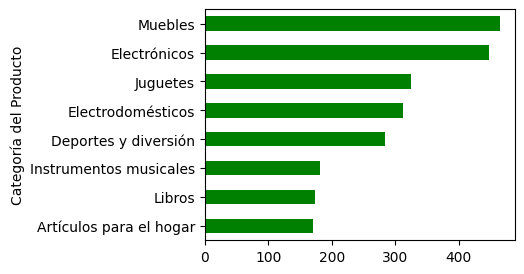

In [8]:
## Contar cuantos productos por categoria vendio cada tienda y mostrar solo el maximo
categorias1 = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True)
categorias1.plot(kind='barh', figsize=(4, 3), color="green")

<Axes: ylabel='Categoría del Producto'>

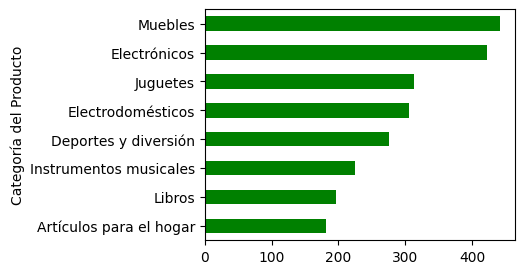

In [9]:
categorias2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True)
categorias2.plot(kind='barh', figsize=(4, 3), color="green")

<Axes: ylabel='Categoría del Producto'>

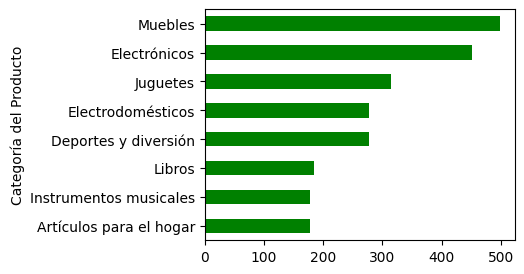

In [10]:
categorias3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True)
categorias3.plot(kind='barh', figsize=(4, 3), color="green")

<Axes: ylabel='Categoría del Producto'>

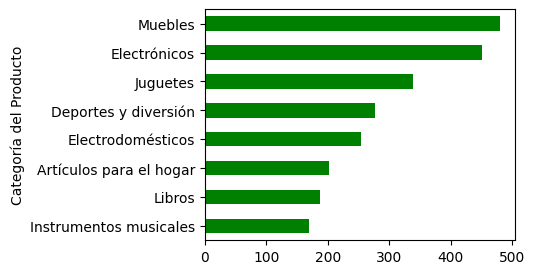

In [11]:
categorias4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True)
categorias4.plot(kind='barh', figsize=(4, 3), color="green")

# 3. Calificación promedio de la tienda


Podemos visualizar como Tienda 1 y 4 Son las tiendas con peor puntaje en experiencia de compra

<Axes: >

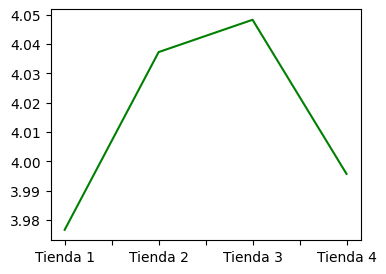

In [43]:
calificaciones = pd.Series({
"Tienda 1" : tienda['Calificación'].mean(),
"Tienda 2" : tienda2['Calificación'].mean(),
"Tienda 3" : tienda3['Calificación'].mean(),
"Tienda 4" : tienda4['Calificación'].mean()
})

calificaciones.plot(kind='line', figsize=(4, 3), color="green")

# 4. Productos más y menos vendidos

Podemos visualizar como los productos mas vendidos son 'Cama Box - Tienda 4' y 'Inicienado programación - Tienda 2'
Mientras que los menos vendidos se encuentran en 'Juego de mesa - Tienda 2' y 'Guitarra Electrica - Tienda 4'

<Axes: >

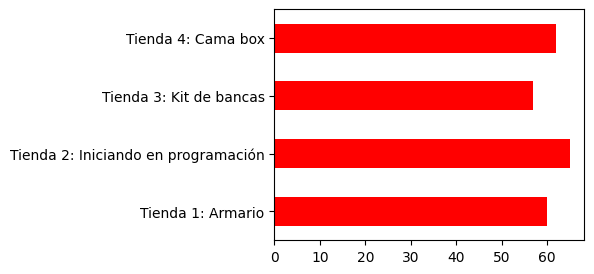

In [13]:
#Contar el producto con mayor venta por tienda
mayor1 = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(1)
mayor2 = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(1)
mayor3 = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(1)
mayor4 = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(1)

grafica_mayor = pd.Series({
    f"Tienda 1: {mayor1.index[0]}": mayor1.values[0],
    f"Tienda 2: {mayor2.index[0]}": mayor2.values[0],
    f"Tienda 3: {mayor3.index[0]}": mayor3.values[0],
    f"Tienda 4: {mayor4.index[0]}": mayor4.values[0]
})

grafica_mayor.plot(kind='barh', figsize=(4, 3), color="red")

<Axes: >

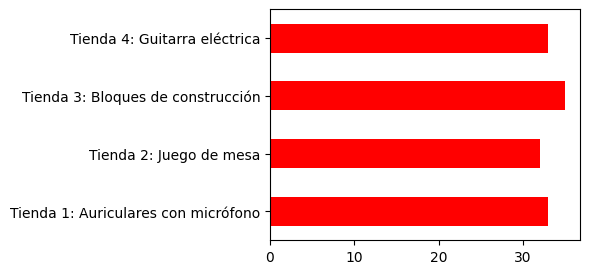

In [14]:
#Productos con menor venta por tienda
menor1 = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False).tail(1)
menor2 = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False).tail(1)
menor3 = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False).tail(1)
menor4 = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False).tail(1)

grafica_mayor = pd.Series({
    f"Tienda 1: {menor1.index[0]}": menor1.values[0],
    f"Tienda 2: {menor2.index[0]}": menor2.values[0],
    f"Tienda 3: {menor3.index[0]}": menor3.values[0],
    f"Tienda 4: {menor4.index[0]}": menor4.values[0]
})

grafica_mayor.plot(kind='barh', figsize=(4, 3), color="red")

# 5. Envío promedio por tienda

Podemos visualizar como tienda 1 posee los costos de envío mas caros, mientras que tienda 4 presenta el valor inferior de la medida


<Axes: >

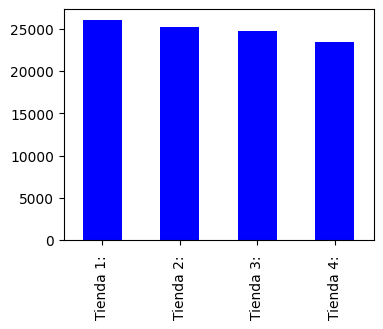

In [31]:
costo_promedio = pd.Series({
    "Tienda 1: " : tienda['Costo de envío'].mean(),
    "Tienda 2: " : tienda2['Costo de envío'].mean(),
    "Tienda 3: " : tienda3['Costo de envío'].mean(),
    "Tienda 4: " : tienda4['Costo de envío'].mean()
})

costo_promedio.plot(kind='bar', figsize=(4, 3), color="blue")

#Realizar el grafico de costo_promedio con la libreria de Matplotlib
costo_promedio.plot(kind='bar', figsize=(4, 3), color="blue")

# Conclusión
Dato el analisis previo, se sugiere considerar tienda 4 como tienda candidata a cerrarse proximamente. Debido a los bajos niveles de facturación, y opiniones de clientes.